In [1]:
# importing the dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [7]:
data = pd.read_excel("/content/Boston_Housing.xlsx")
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [9]:
data.shape

(506, 14)

In [8]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    int64  
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    int64  
 9   TAX      506 non-null    int64  
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


linear regression with one features and one target

In [11]:
df_1feat = data[['LSTAT', "MEDV"]]
df_1feat

,LSTAT,MEDV
0,4.98,24.0
1,9.14,21.6
2,4.03,34.7
3,2.94,33.4
4,5.33,36.2
...,...,...
501,9.67,22.4
502,9.08,20.6
503,5.64,23.9
504,6.48,22.0


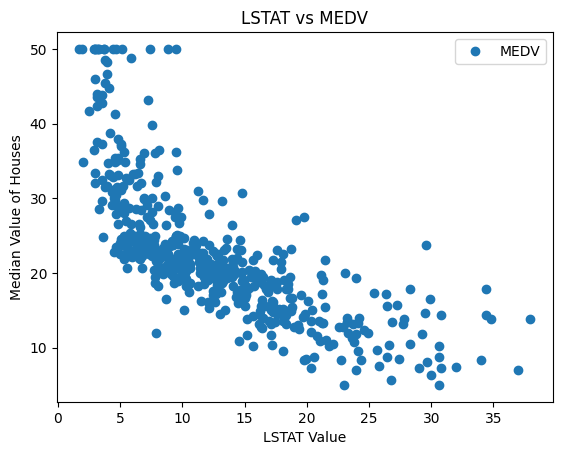

In [14]:
df_1feat.plot(x= "LSTAT", y= "MEDV", style= "o")
plt.title("LSTAT vs MEDV")
plt.xlabel("LSTAT Value")
plt.ylabel("Median Value of Houses")
plt.show()

In [15]:
# segreagate the dependent and independent variables
x = pd.DataFrame(df_1feat["LSTAT"])
y = pd.DataFrame(df_1feat["MEDV"])

In [16]:
# divide the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [17]:
print(f"X_train shape is: {x_train.shape}")
print(f"Y_train shape is: {y_train.shape}")
print("-"*30)
print(f"X_test shape is: {x_test.shape}")
print(f"Y_test shape is: {y_test.shape}")

X_train shape is: (404, 1)
Y_train shape is: (404, 1)
------------------------------
X_test shape is: (102, 1)
Y_test shape is: (102, 1)


In [18]:
# create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model


LinearRegression()

In [19]:
# fit the model -> linear regresstion

model.fit(x_train, y_train)

LinearRegression()

In [20]:
print(model.coef_)

[[-0.9665309]]


In [21]:
print(model.intercept_)

[34.83694982]


In [25]:
# predictions

y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns= ["Predicted"])
y_pred.size

102

In [26]:
y_pred

,Predicted
0,26.099510
1,31.425096
2,17.371736
3,29.501699
4,18.144961
...,...
97,1.617283
98,17.391067
99,14.327164
100,22.407362


In [27]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [31]:
from sklearn import metrics

In [33]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

print(f"Rsquared: {metrics.r2_score(y_test, y_pred)}")

MAE: 4.184807930623362
MSE: 33.51954917268489
RMSE: 5.789606996393182
Rsquared: 0.5429180422970384


Multiple Linear Regression


In [34]:
#segregate the Dependent and independent variables

x = pd.DataFrame(data.iloc[:, :-1])
y = pd.DataFrame(data.iloc[:, -1])

In [35]:
# divide the dataset into train and test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [36]:
print(f"X_train shape is: {x_train.shape}")
print(f"Y_train shape is: {y_train.shape}")
print("-"*30)
print(f"X_test shape is: {x_test.shape}")
print(f"Y_test shape is: {y_test.shape}")

X_train shape is: (404, 13)
Y_train shape is: (404, 1)
------------------------------
X_test shape is: (102, 13)
Y_test shape is: (102, 1)


In [37]:
# create the model
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model

LinearRegression()

In [38]:
# fit the model -> linear regresstion

model.fit(x_train, y_train)

LinearRegression()

In [39]:
print(model.intercept_)

[30.24675099]


In [40]:
print(model.coef_)

[[-1.13055924e-01  3.01104641e-02  4.03807204e-02  2.78443820e+00
  -1.72026334e+01  4.43883520e+00 -6.29636221e-03 -1.44786537e+00
   2.62429736e-01 -1.06467863e-02 -9.15456240e-01  1.23513347e-02
  -5.08571424e-01]]


In [41]:
# predictions

y_pred = model.predict(x_test)
y_pred = pd.DataFrame(y_pred, columns= ["Predicted"])
y_pred.size

102

In [42]:
y_pred

,Predicted
0,28.996724
1,36.025565
2,14.816944
3,25.031979
4,18.769880
...,...
97,-0.164237
98,13.684867
99,16.183597
100,22.276220


In [43]:
y_test

,MEDV
173,23.6
274,32.4
491,13.6
72,22.8
452,16.1
...,...
412,17.9
436,9.6
411,17.2
86,22.5


In [44]:
print(f"MAE: {metrics.mean_absolute_error(y_test, y_pred)}")
print(f"MSE: {metrics.mean_squared_error(y_test, y_pred)}")
print(f"RMSE: {np.sqrt(metrics.mean_squared_error(y_test, y_pred))}")

print(f"Rsquared: {metrics.r2_score(y_test, y_pred)}")

MAE: 3.189091965887837
MSE: 24.291119474973478
RMSE: 4.928602182665332
Rsquared: 0.6687594935356326
